# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:

# OpenWeatherMap API Key
api_key = "2836272a08f4c12836dbe527f28b7f58"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=carnarvon
Processing Record 2 of Set 1 | yeletskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=yeletskiy
City not found. Skipping...
Processing Record 3 of Set 1 | quepos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=quepos
Processing Record 4 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=nikolskoye
Processing Record 5 of Set 1 | firminy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=firminy
Processing Record 6 of Set 1 | ankazoabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=ankazo

Processing Record 4 of Set 2 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=marcona
City not found. Skipping...
Processing Record 5 of Set 2 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=georgetown
Processing Record 6 of Set 2 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=vostok
Processing Record 7 of Set 2 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=lompoc
Processing Record 8 of Set 2 | ourem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=ourem
Processing Record 9 of Set 2 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=tsihombe
City not found. Skipping...
Processing Record 10 of Set 2 | aberdeen
htt

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=la%20asuncion
Processing Record 9 of Set 3 | gold coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=gold%20coast
Processing Record 10 of Set 3 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=kavaratti
Processing Record 11 of Set 3 | micheweni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=micheweni
Processing Record 12 of Set 3 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=palmer
Processing Record 13 of Set 3 | truckee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=truckee
Processing Record 14 of Set 3 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=283627

City not found. Skipping...
Processing Record 14 of Set 4 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=ilulissat
Processing Record 15 of Set 4 | ajdabiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=ajdabiya
Processing Record 16 of Set 4 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=san%20policarpo
Processing Record 17 of Set 4 | ituni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=ituni
City not found. Skipping...
Processing Record 18 of Set 4 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=korla
City not found. Skipping...
Processing Record 19 of Set 4 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=tiksi
Pr

Processing Record 18 of Set 5 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=cairns
Processing Record 19 of Set 5 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=saint%20george
Processing Record 20 of Set 5 | svobodnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=svobodnyy
Processing Record 21 of Set 5 | kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=kalmunai
Processing Record 22 of Set 5 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=mys%20shmidta
City not found. Skipping...
Processing Record 23 of Set 5 | santiago de cao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=santiago%20de%20cao
Processing Record 24

Processing Record 24 of Set 6 | suntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=suntar
Processing Record 25 of Set 6 | ruatoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=ruatoria
City not found. Skipping...
Processing Record 26 of Set 6 | chase
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=chase
Processing Record 27 of Set 6 | karamay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=karamay
City not found. Skipping...
Processing Record 28 of Set 6 | kaduna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=kaduna
Processing Record 29 of Set 6 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=haines%20junction
Processing Record 30 of Se

Processing Record 30 of Set 7 | ostrowiec swietokrzyski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=ostrowiec%20swietokrzyski
Processing Record 31 of Set 7 | barcelona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=barcelona
Processing Record 32 of Set 7 | mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=mogadishu
Processing Record 33 of Set 7 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=dunedin
Processing Record 34 of Set 7 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=saint-augustin
Processing Record 35 of Set 7 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=hambantota
Processing Record 36 of Set 7 | 

Processing Record 34 of Set 8 | sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=sakakah
City not found. Skipping...
Processing Record 35 of Set 8 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=mount%20isa
Processing Record 36 of Set 8 | synya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=synya
Processing Record 37 of Set 8 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=vaitupu
City not found. Skipping...
Processing Record 38 of Set 8 | sorvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=sorvag
City not found. Skipping...
Processing Record 39 of Set 8 | umm durman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=umm%20durman
Ci

Processing Record 36 of Set 9 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=xining
Processing Record 37 of Set 9 | doka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=doka
Processing Record 38 of Set 9 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=kudahuvadhoo
Processing Record 39 of Set 9 | kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=kangaatsiaq
Processing Record 40 of Set 9 | ozgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=ozgon
City not found. Skipping...
Processing Record 41 of Set 9 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=gat
Processing Record 42 of Set 9 | savannah bight
http://api.openweathe

Processing Record 41 of Set 10 | phan rang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=phan%20rang
City not found. Skipping...
Processing Record 42 of Set 10 | santa vitoria do palmar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=santa%20vitoria%20do%20palmar
Processing Record 43 of Set 10 | laramie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=laramie
Processing Record 44 of Set 10 | fuxin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=fuxin
Processing Record 45 of Set 10 | kidero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=kidero
Processing Record 46 of Set 10 | quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=quelimane
Processing Record 

Processing Record 43 of Set 11 | bermejo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=bermejo
Processing Record 44 of Set 11 | marienburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=marienburg
Processing Record 45 of Set 11 | george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=george
Processing Record 46 of Set 11 | nador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=nador
Processing Record 47 of Set 11 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=port%20lincoln
Processing Record 48 of Set 11 | kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=kurilsk
Processing Record 49 of Set 11 | coahuayana
http://api.openweathermap.org/da

Processing Record 48 of Set 12 | kiunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=kiunga
Processing Record 49 of Set 12 | beisfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=beisfjord
Processing Record 0 of Set 13 | shaoyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=shaoyang
Processing Record 1 of Set 13 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=vilyuysk
Processing Record 2 of Set 13 | mandera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=mandera
Processing Record 3 of Set 13 | campbell river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2836272a08f4c12836dbe527f28b7f58&q=campbell%20river
Processing Record 4 of Set 13 | kawalu
http://api.openweathermap.org/d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Convertion
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Count
city_data_pd.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [29]:
city_data_pd.to_csv("City_Data")
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,carnarvon,0,ZA,1572759836,12,-30.97,22.13,66.90,6.73
1,quepos,63,CR,1572760361,83,9.43,-84.16,70.00,8.05
2,nikolskoye,90,RU,1572760074,93,59.70,30.79,36.00,11.18
3,firminy,100,FR,1572760361,66,45.39,4.29,57.20,12.75
4,ankazoabo,53,MG,1572760364,38,-22.29,44.51,81.05,11.83


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

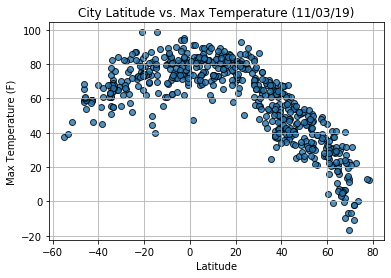

In [30]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

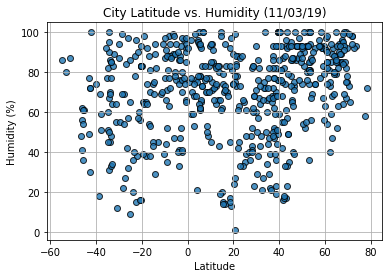

In [31]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

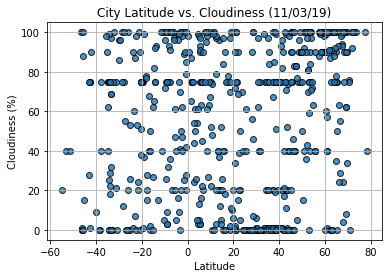

In [32]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

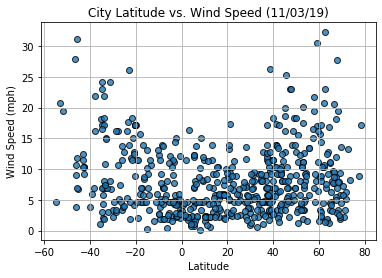

In [33]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [34]:
# OPTIONAL: Create a function to create Linear Regression plots


In [35]:
# Create Northern and Southern Hemisphere DataFrames
n_hem_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
s_hem_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8891541811916742


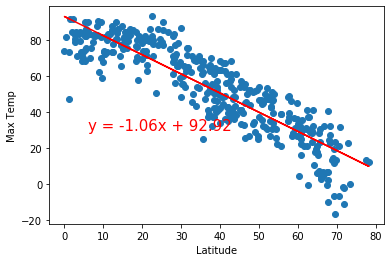

In [36]:
x_values = n_hem_df["Lat"]
y_values = n_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5789729035992823


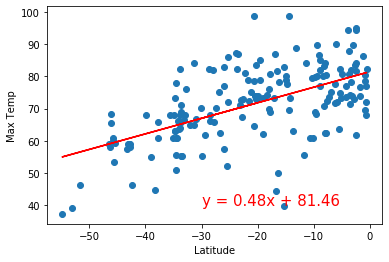

In [37]:
x_values = s_hem_df["Lat"]
y_values = s_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22795655948592078


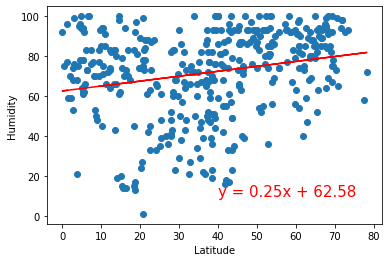

In [38]:
x_values = n_hem_df["Lat"]
y_values = n_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20843052755378713


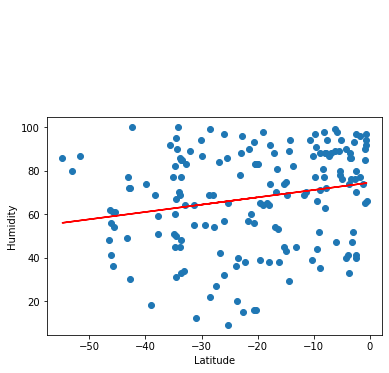

In [39]:
x_values = s_hem_df["Lat"]
y_values = s_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2234187322310927


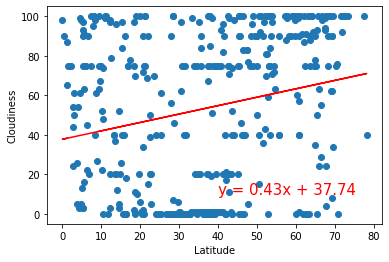

In [40]:
x_values = n_hem_df["Lat"]
y_values = n_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1915095388572529


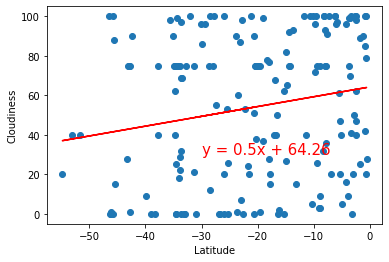

In [41]:
x_values = s_hem_df["Lat"]
y_values = s_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.29234085084457967


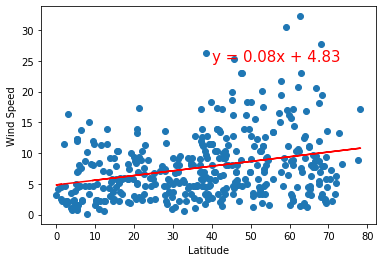

In [42]:
x_values = n_hem_df["Lat"]
y_values = n_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.36645488614531596


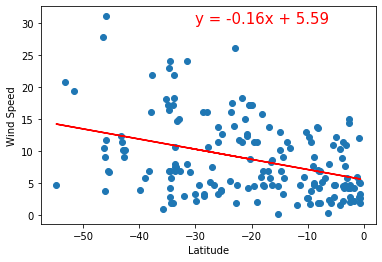

In [43]:
x_values = s_hem_df["Lat"]
y_values = s_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))